# Taller Monopoly

In [1]:
from IPython.display import Image
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Punto 1

¡Hugo, Paco y Luis necesitan tu ayuda! Los pobres muchachos requieren encontrar un tesoro, espero que tú (Tío Rico) seas capaz de llevarlos a su primer millón. Hay 4 formas con las que vas a llegar al tesoro:
<br>
<ul>
    <li>Escala la imagen a 1080*720</li>
    <li>Realiza una reflexión horizontal con una imagen escalada a 1280*800</li>
    <li>Realiza una inclinación en y de 0.3</li>
    <li>Mueve la imagen en x en un 20%, en y al 30%. En caso tal de que haya espacios negros (vacíos), deberás de rellenarlos con el promedio de la escala de grises de la imagen (Si desea hacerlo, puede usar una distribución normal para rellenar el espacio negro)</li>
</ul>

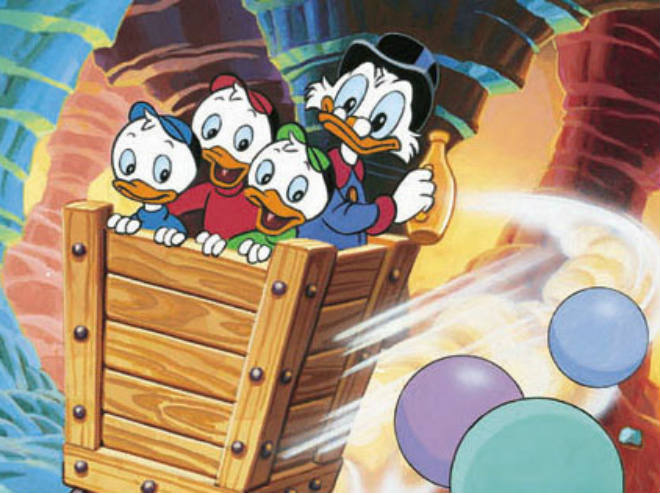

In [5]:
Image("res/primero/primero.jpg")

Text(0.5, 1.0, 'Interpolación vecinos más cercanos')

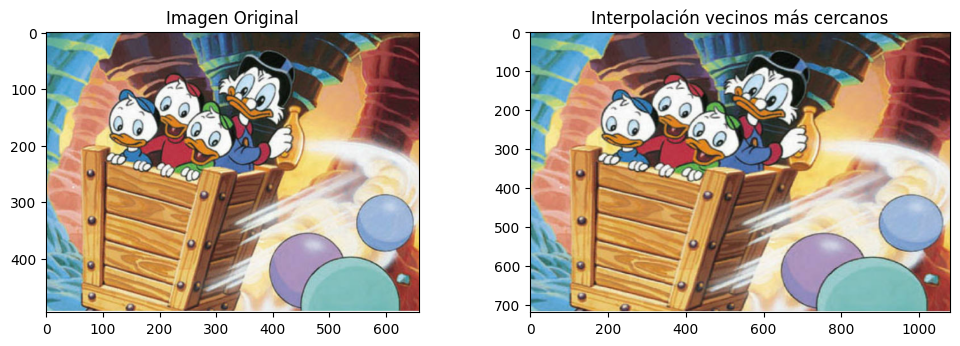

In [7]:
# Literal: Escala la imagen a 1080*720

#Leer la imagen de entrada a color y convertirla RGB
img = cv2.imread('res/primero/primero.jpg',cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

nueva_resolucion = (1080, 720)

nearest = cv2.resize(img, nueva_resolucion, interpolation = cv2.INTER_NEAREST)

#Generar figura 1x2 para mostrar y contrastar las aproximaciones con la imagen original
fig = plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(2,2,2)
plt.imshow(nearest,cmap='gray')
plt.title("Interpolación vecinos más cercanos")

Text(0.5, 1.0, 'Reflexión horizontal con imagen escalada a 1280*800')

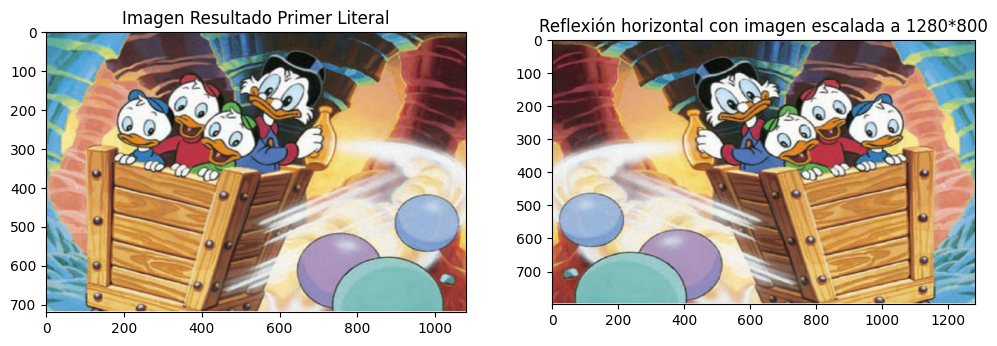

In [12]:
# Literal: Realiza una reflexión horizontal con una imagen escalada a 1280*800

resolucion_2 = (1280, 800)

imagen = cv2.resize(nearest, resolucion_2, interpolation = cv2.INTER_NEAREST)

#Obtener los datos de filas y columnas de la imagen
filas,columnas = 800, 1280

#Generar la matriz de reflexión en X
matriz_afin_ref_x = np.float32([[-1,0,columnas]
                                ,[0,1,0]])
#Aplicar la matriz de transformación de reflexión X a la imagen
ref_x = cv2.warpAffine(imagen,matriz_afin_ref_x,(columnas,filas))

#Generar figura 1x2 para mostrar y contrastar los resultados
fig = plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(nearest,cmap='gray')
plt.title("Imagen Resultado Primer Literal")

plt.subplot(2,2,2)
plt.imshow(ref_x,cmap='gray')
plt.title("Reflexión horizontal con imagen escalada a 1280*800")

Text(0.5, 1.0, 'Inclinación en Y de 0.3')

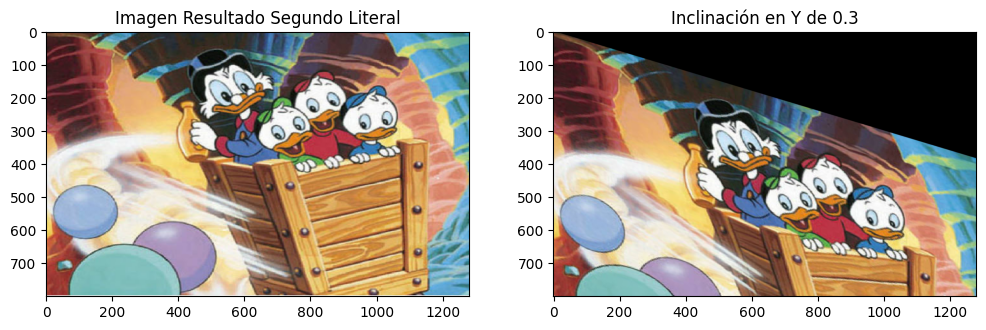

In [15]:
# Literal: Realiza una inclinación en y de 0.3

#Generar la matriz de inclinación en Y
inc_x = 0.0
inc_y = 0.3
matriz_afin = np.float32([[1,inc_x,0],
                          [inc_y,1,0]])

#Aplicar la matriz de transformación de inclinación Y a la imagen
inclinacion_y = cv2.warpAffine(ref_x,matriz_afin,(columnas,filas))

#Generar figura 1x2 para mostrar y contrastar los resultados
fig = plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(ref_x,cmap='gray')
plt.title("Imagen Resultado Segundo Literal")

plt.subplot(2,2,2)
plt.imshow(inclinacion_y,cmap='gray')
plt.title("Inclinación en Y de 0.3")

Text(0.5, 1.0, 'Traslación en X 20% y en Y 30%')

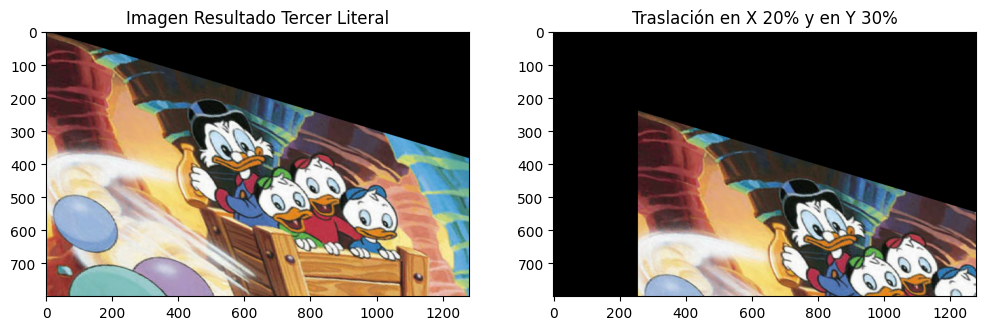

In [18]:
# Literal: Mueve la imagen en x en un 20%, en y al 30%

# Se asignan valores a tx y ty, se construye la matriz de traslación
tx = 0.2 * columnas
ty = 0.3 * filas
matriz_afin_traslacion = np.float32([[1,0,tx],
                                     [0,1,ty]])

#Aplicar la matriz de transformación de traslación a la imagen
traslacion = cv2.warpAffine(inclinacion_y,matriz_afin_traslacion,(columnas,filas))

#Generar figura 1x2 para mostrar y contrastar los resultados
fig = plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(inclinacion_y,cmap='gray')
plt.title("Imagen Resultado Tercer Literal")

plt.subplot(2,2,2)
plt.imshow(traslacion,cmap='gray')
plt.title("Traslación en X 20% y en Y 30%")



Text(0.5, 1.0, 'Resultado Final')

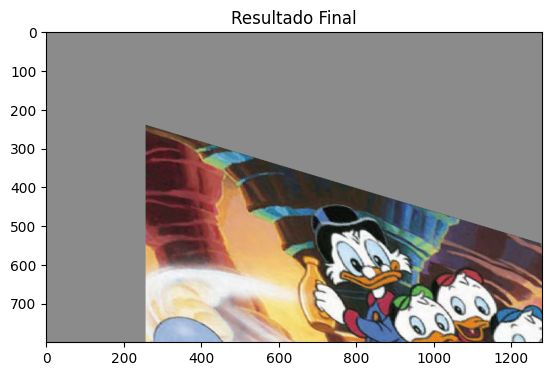

In [19]:
# Como se puede observar, la imagen resultante tiene espacios negros, por lo que se procede a rellenarlos con el promedio de la escala de grises de la imagen

# Obtengo los sitios donde la imagen sea negro
espacios_negros = traslacion == 0

# Obtengo el promedio de la escala de grises y lo aplico a los sitios obtenidos
promedio_escala_grises = np.mean(cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY))
traslacion[espacios_negros] = promedio_escala_grises

plt.imshow(traslacion, cmap='gray')
plt.title("Resultado Final")

## Punto 2

En este punto, usted deberá de realizar una función de ruido que sea de pimienta y granular (mínimo el 20% de la imagen debe de tener ruido, esto se debe hacer en RGB)

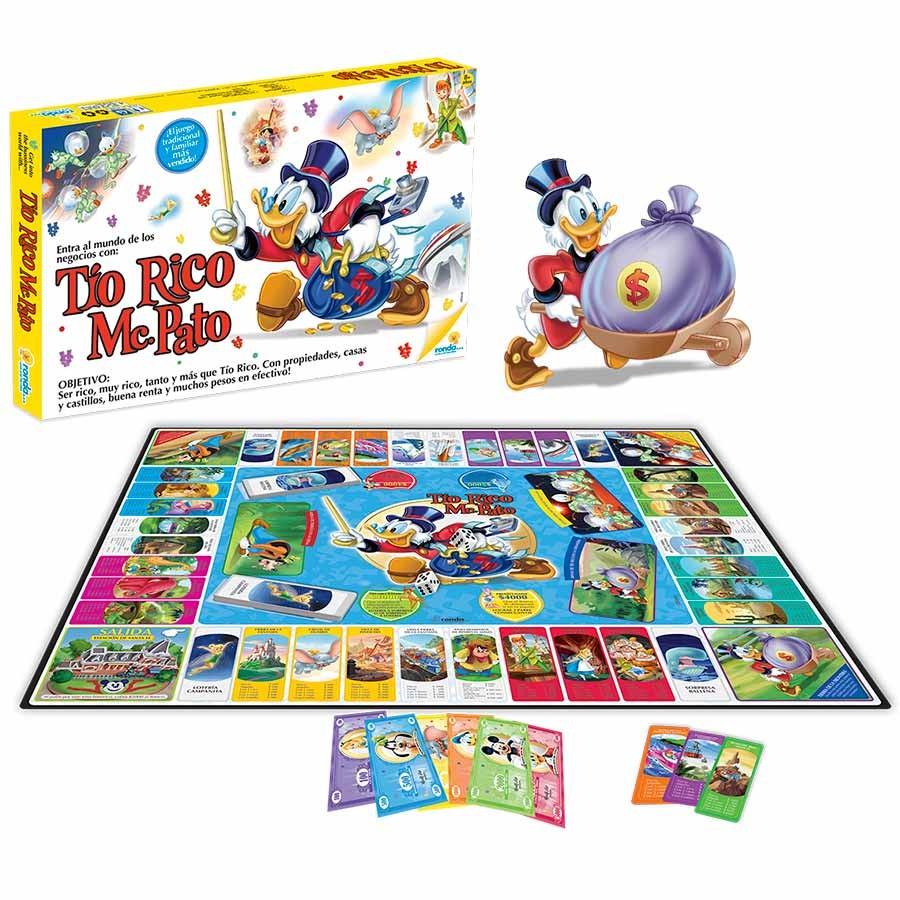

In [3]:
Image("res/segundo/segundo.jpg")

Text(0.5, 1.0, 'Imagen con ruido de pimienta y granular')

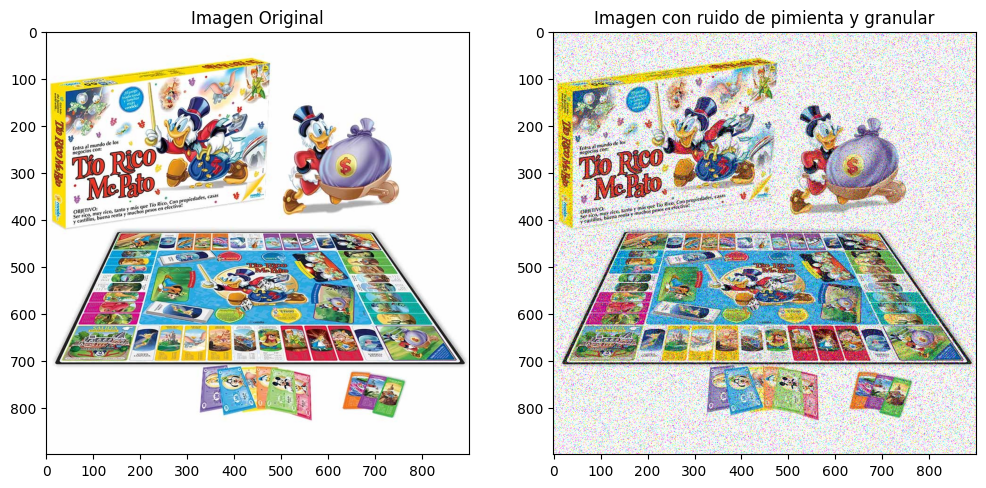

In [20]:
# Generación de la función de pimienta y granular

def ruido_pimienta_granular(img, amount = 0.2):
    """
    Agrega ruido de sal y pimienta y ruido granular a una imagen en color.
    :param img: imagen de entrada (numpy array).
    :param porcentaje: porcentaje de píxeles que se convertirán en ruido de sal o pimienta (valor entre 0 y 1).
    :return: imagen con ruido de sal y pimienta y ruido granular(numpy array).
    """
    #Obtener los valores de row, col, ch de la imagen de entrada
    row = img.shape[0]
    col = img.shape[1]
    ch =  img.shape[2] if len(img.shape) == 3 else 1  
    
    # Generar porcentaje de cada tipo de ruido
    cantidad = amount / 2
    
    #Crear la copia de la imagen de entrada
    img_ruido = img.copy()
    # Agregar ruido a cada canal de color por separado
    ruido = np.random.rand(*img.shape)
    img_ruido[ruido < cantidad / 2] = 0
    img_ruido[ruido > 1 - cantidad / 2] = 255
    
    #Modelar el ruido granular como una distribución uniforme 
    uni_noise = np.random.uniform(-cantidad,cantidad,(row,col,ch)) if ch > 1 else np.random.uniform(-cantidad,cantidad,(row,col)) 
                                                        
    #Se ajusta el tamaño de la imagen con ruido
    uni_noise = uni_noise.reshape(row,col,ch)   if ch > 1 else uni_noise.reshape(row,col)     
    #Obtener la imagen ruidosa y ajustarla con datos entre 0 y 255
    noisy = img_ruido + img_ruido * uni_noise
    noisy[noisy<0] = 0
    noisy[noisy>255] = 255

    return noisy

#Leer la imagen de entrada a color y convertirla RGB
img = cv2.imread('res/segundo/segundo.jpg',cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Aplicar la función de ruido de pimienta y granular a la imagen
img_ruido = ruido_pimienta_granular(img, 0.2)
img_ruido = img_ruido.astype(np.uint8)

#Generar figura 1x2 para mostrar y contrastar los resultados
fig = plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,2,2)
plt.imshow(img_ruido,cmap='gray')
plt.title("Imagen con ruido de pimienta y granular")

## Punto 3

Agarre la imagen resultado del punto anterior y realice un filtro tal que se puedan eliminar algunas imperfecciones de la imagen (No tiene que quedar perfecto, la idea es que entienda las utilidades de cada filtrado)

Text(0.5, 1.0, 'Imagen filtrada con kernel 7')

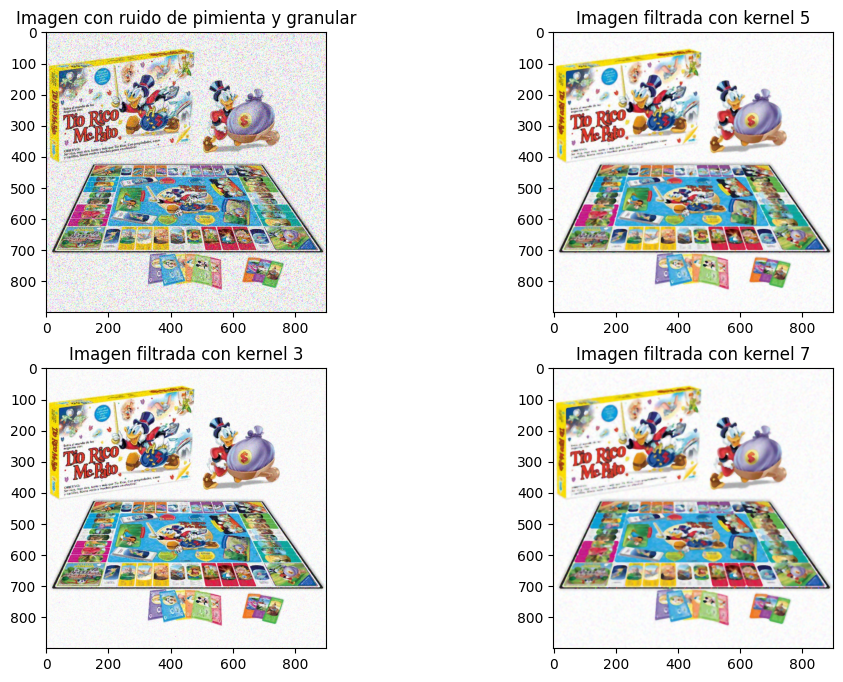

In [26]:
# Aplicar un filtro de mediana a la imagen con ruido

kernel = 5
img_filtrada = cv2.medianBlur(img_ruido, kernel)

kernel2 = 3
img_filtrada2 = cv2.medianBlur(img_ruido, kernel2)

kernel3 = 7
img_filtrada3 = cv2.medianBlur(img_ruido, kernel3)

# Generar figura 2x2 para mostrar y contrastar los resultados
fig = plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(img_ruido,cmap='gray')
plt.title("Imagen con ruido de pimienta y granular")

plt.subplot(2,2,2)
plt.imshow(img_filtrada,cmap='gray')
plt.title("Imagen filtrada con kernel 5")

plt.subplot(2,2,3)
plt.imshow(img_filtrada2,cmap='gray')
plt.title("Imagen filtrada con kernel 3")

plt.subplot(2,2,4)
plt.imshow(img_filtrada3,cmap='gray')
plt.title("Imagen filtrada con kernel 7")

Se escogió este filtro, ya que, por lo visto en los ejemplos de la clase, parece ser muy efectivo para eliminar ruido de pimienta y granular.
Además, podemos ver que a medida que aumenta el kernel, a pesar de que mejora un poco la eliminación del ruido, se paga con perder un poco de nitidez de la imagen obtenida, por lo que se deduce que es importante obtener un balance entre la nitidez necesaria y los problemas ocasionados por el ruido de la imagen.